In [3]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

import sklearn.datasets;
data = sklearn.datasets.load_breast_cancer()


# Data Imbalance Check
There are 212 malacious and 357 benign samples in the dataset. The data is relatively balanced.

In [4]:
data, target = sklearn.datasets.load_breast_cancer(return_X_y = True, as_frame = True)
print(target.value_counts())
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 512)

target
1    357
0    212
Name: count, dtype: int64


# Useful functions and values for final evaluation

In [5]:
#initializing useful lists
accuracies = {"Test": {}, "Train": {}}
precisions = {"Test": {}, "Train": {}}
recall = {"Test": {}, "Train": {}}
f_score = {"Test": {}, "Train": {}}

def set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name):
    test_precision, test_recall, test_f_score, _ = precision_recall_fscore_support(y_test, test_predictions)
    train_precision, train_recall, train_f_score, _ = precision_recall_fscore_support(y_train, train_predictions)

    # test_accuracy = 

    # print(name, 1 - test_precision, 1 - test_recall, 1 - test_f_score)
    # print(name, 1 - train_precision, 1 - train_recall, 1 - train_f_score)

    precisions["Test"][name] = test_precision
    precisions["Train"][name] = train_precision

    recall["Test"][name] = test_recall
    recall["Train"][name] = train_recall

    f_score["Test"][name] = test_f_score
    f_score["Train"][name] = train_f_score

def set_accuracies(name, train_accuracy, test_accuracy):
    accuracies["Train"][name] = train_accuracy
    accuracies["Test"][name] = test_accuracy


# Classifiers

In [6]:
# Jeff's changes: DecisionTreeClassifier


dTree = DecisionTreeClassifier(random_state = 512)

dTree.fit(x_train, y_train)

test_score = dTree.score(x_test, y_test)
train_score = dTree.score(x_train, y_train)
print(f"A Decision Tree classifier running on the breast cancer dataset from sklearn gives an accuracy of{train_score * 100: .3f}% on the training data and an accuracy of{test_score * 100: .3f}% on the testing data.")

test_predictions = dTree.predict(x_test)
train_predictions = dTree.predict(x_train)

name = "Decision Tree Classifier"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)

A Decision Tree classifier running on the breast cancer dataset from sklearn gives an accuracy of 100.000% on the training data and an accuracy of 90.210% on the testing set.


In [13]:
#requires installing xgboost using pip install xgboost to work.
from xgboost import XGBClassifier

data, target = sklearn.datasets.load_breast_cancer(return_X_y = True, as_frame = True)

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 512)

xgbClassifier = XGBClassifier(random_state = 42)
xgbClassifier.fit(x_train.to_numpy(), y_train.to_numpy()) # looking up in xgboost docs, it can't be a pandas dataframe, but can be a numpy array.

test_score = xgbClassifier.score(x_test, y_test)
train_score = xgbClassifier.score(x_train, y_train)
print(f"An XGBoost classifier running on the breast cancer dataset from sklearn gives an accuracy of{train_score * 100: .3f}% on the training data and an accuracy of{test_score * 100: .3f}% on the testing data.")




test_predictions = xgbClassifier.predict(x_test)
train_predictions = xgbClassifier.predict(x_train)


name = "XGBoost"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)



An XGBoost classifier running on the breast cancer dataset from sklearn gives a probility of 94.406% on the training data and a probability of 100.000%.
XGBoost [0.08163265 0.04255319] [0.08163265 0.04255319] [0.08163265 0.04255319]
XGBoost [0. 0.] [0. 0.] [0. 0.]


In [9]:
#James's Changes: Bagging Classifier
data, target = sklearn.datasets.load_breast_cancer(return_X_y = True, as_frame = True)
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 512)

bagging = BaggingClassifier(random_state = 512)
bagging.fit(x_train, y_train)

test_score = bagging.score(x_test, y_test)
train_score = bagging.score(x_train, y_train)
print(f"A Bagging classifier running on the breast cancer dataset from sklearngives an accuracy of{train_score * 100: .3f}% on the training data and an accuracy of{test_score * 100: .3f}% on the testing data.")




test_predictions = bagging.predict(x_test)
train_predictions = bagging.predict(x_train)

name = "Bagging"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)

A Bagging classifier running on the breast cancer dataset from sklearngives an accuracy of 99.296% on the training data and an accuracy of 93.007% on the testing data.


In [8]:
# Lucia's changes

data, target = sklearn.datasets.load_breast_cancer(return_X_y = True, as_frame = True)
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 512)


adaboost = AdaBoostClassifier(random_state=512)
adaboost.fit(x_train, y_train)

test_score = adaboost.score(x_test, y_test)
train_score = adaboost.score(x_train, y_train)
print(f"An Adaboost classifier running on the breast cancer dataset from sklearn gives an accuracy of{train_score * 100: .3f}% on the training data and an accuracy of{test_score * 100: .3f}% on the testing data.")

test_predictions = adaboost.predict(x_test)
train_predictions = adaboost.predict(x_train)

name = "AdaBoost"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)

An Adaboost classifier running on the breast cancer dataset from sklearn gives an accuracy of 100.000% on the training data and an accuracy of 94.406% on the testing data.


c:\Users\lucia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [7]:
# Natasha

data, target = sklearn.datasets.load_breast_cancer(return_X_y = True, as_frame = True)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 5)

random_forest = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
random_forest.fit(x_train, y_train)

test_score = random_forest.score(x_test, y_test)
train_score = random_forest.score(x_train, y_train)

print(f"A Random Forest classifier running on the breast cancer dataset from sklearn gives an accuracy of{train_score * 100: .3f}% on the training data and an accuracy of{test_score * 100: .3f}% on the testing data.")





test_predictions = random_forest.predict(x_test)
train_predictions = random_forest.predict(x_train)

name = "Random Forest Classifier"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)

A Random Forest classifier running on the breast cancer dataset from sklearn gives an accuracy of 99.780% on the training data and an accuracy of 97.368% on the testing data.


# Benchmarks
Comparing tables that compare the Accuracy, Precision and Recall of the different models.

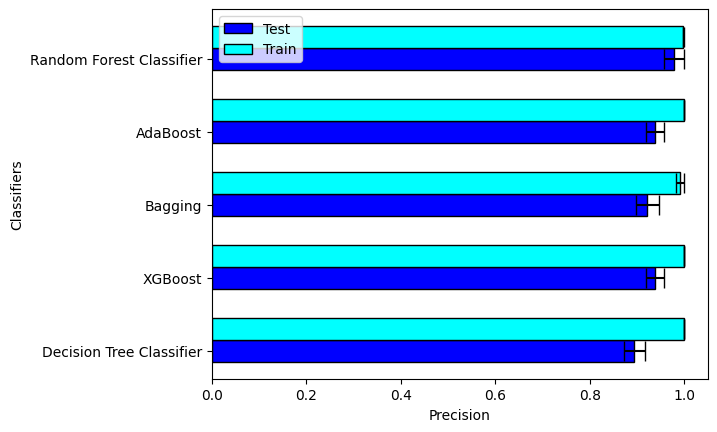

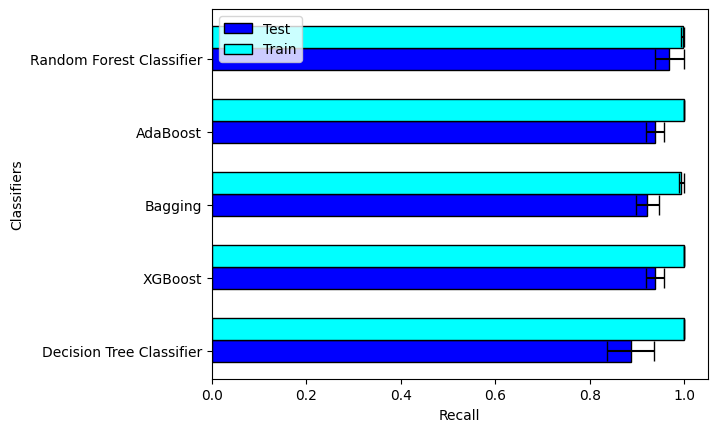

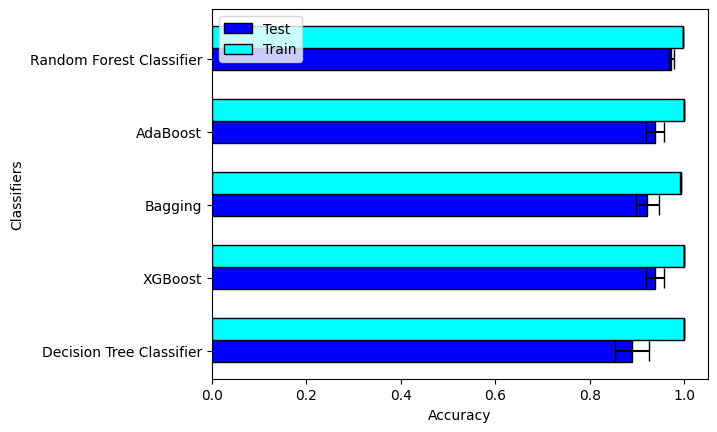

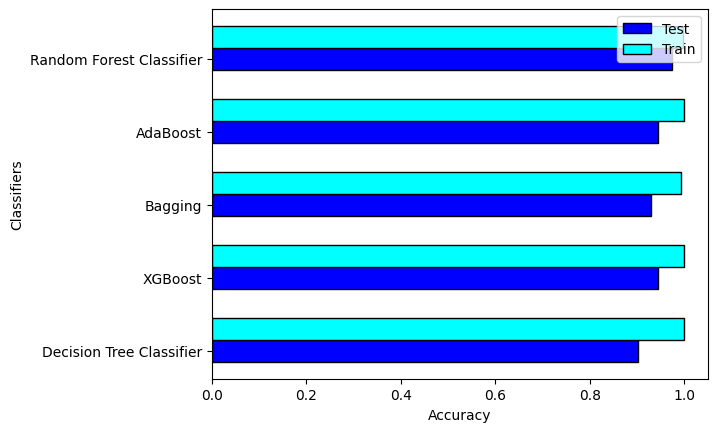

In [151]:
def draw_table_w_conf_int(data, statistic):
    bar_width = 0.3

    classifiers = list(data["Test"].keys())
    test_results = list(data["Test"].values())
    train_results = list(data["Train"].values())
    test_exp = []
    test_err = []
    for test_result in test_results:
        test_exp.append(test_result[0] + (test_result[1] - test_result[0]) / 2)
        test_err.append(abs(test_result[1] - test_result[0]) / 2)

    train_exp = []
    train_err = []
    for train_result in train_results:
        train_exp.append(train_result[0] + (train_result[1] - train_result[0]) / 2)
        train_err.append(abs(train_result[1] - train_result[0]) / 2)
    
    r1 = np.arange(len(test_exp))
    r2 = [x + bar_width for x in r1]

    plt.barh(r1, test_exp, height = bar_width, color = 'blue', edgecolor = 'black', xerr=test_err, capsize=7, label="Test")

    plt.barh(r2, train_exp, height = bar_width, color = 'cyan', edgecolor = 'black', xerr=train_err, capsize=7, label='Train')

    plt.yticks([r for r in range(len(test_exp))], classifiers)

    plt.xlabel(f"{statistic}")
    plt.ylabel('Classifiers')

    plt.legend()
    plt.show()


def draw_table(data, statistic):
    bar_width = 0.3

    classifiers = list(data["Test"].keys())
    test_results = list(data["Test"].values())
    train_results = list(data["Train"].values())

    
    r1 = np.arange(len(classifiers))
    r2 = [x + bar_width for x in r1]

    plt.barh(r1, test_results, height = bar_width, color = 'blue', edgecolor = 'black', capsize=7, label="Test")

    plt.barh(r2, train_results, height = bar_width, color = 'cyan', edgecolor = 'black', capsize=7, label='Train')

    plt.yticks([r for r in range(len(classifiers))], classifiers)

    plt.xlabel(f"{statistic}")
    plt.ylabel('Classifiers')

    plt.legend()
    plt.show()


draw_table_w_conf_int(precisions, "Precision")

draw_table_w_conf_int(recall, "Recall")

draw_table_w_conf_int(f_score, "F1 score")

draw_table(accuracies, "Accuracy")




    

## ROC Curve

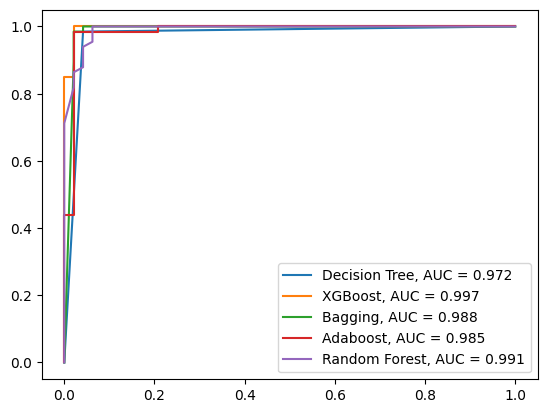

In [18]:
plt.figure(0).clf()

classifiers = {
    "Decision Tree": dTree,
    "XGBoost": xgbClassifier,
    "Bagging": bagging,
    "Adaboost": adaboost,
    "Random Forest": random_forest
}

for name, classifier in classifiers.items():
    y_pred_probs = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    auc = roc_auc_score(y_test, y_pred_probs)
    plt.plot(fpr, tpr, label = f"{name}, AUC = {auc:.3f}")


plt.legend()